# Wrangle and Analyze Data


## Introduction

This project focused on wrangling data from the WeRateDogs Twitter account using Python, documented in a Jupyter Notebook (wrangle_act.ipynb). This Twitter account rates dogs with humorous commentary. The rating denominator is usually 10, however, the numerators are usually greater than 10. They’re Good Dogs Brent wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.
The Data

### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced.".We manually downloaded this file manually by clicking the following link: twitter_archive_enhanced.csv

### Image Predictions File

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) hosted on Udacity's servers and we downloaded it programmatically using python Requests library on the following (URL of the file: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

### Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But we, because we have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? We're going to query Twitter's API to gather this valuable data.
Key Points

Before we start, herea are few points to keep in mind when data wrangling for this project:

* We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

* Fully assessing and cleaning the entire dataset requires exceptional effort so only a subset of its issues (eight (8) quality issues and two (2) tidiness issues at minimum) need to be assessed and cleaned.

* Cleaning includes merging individual pieces of data according to the rules of tidy data.

* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

In [151]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler


# Gathering Data

* **Loading the twitter-archive-enhanced.csv into a DataFrame [WeRateDogs Twitter archive]**

In [152]:
df = pd.read_csv('twitter-archive-enhanced.csv')

* **Loading the tweet image predictions from Udacity's servers**

In [153]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [154]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

* **Loading Favorite count and retweet count from Twitter**

In [155]:
consumer_key ='xxxx'
consumer_secret ='xxxx'
access_token ='xxxx'
access_secret = 'xxxx'

In [156]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
start = timer()
df_list = []
errors = []
for id in archive_df['tweet_id']:
    try:
        tweet = api.get_status(id, tweet_mode='extended')
        df_list.append({'tweet_id': str(tweet.id),
                        'favorite_count': int(tweet.favorite_count),
                        'retweet_count': int(tweet.retweet_count)})
    except Exception as e:
        print(str(id) + " : " + str(e))
        errors.append(id)
end = timer()

In [157]:
df_tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json.txt') as data_file:
    for line in data_file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_tweet_json = df_tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
        columns=['tweet_id', 'retweet_count', 'favorite_count']))
        df_tweet_json = df_tweet_json.reset_index(drop=True)

# Assessing Data

### - Access twitter-archive-enhanced dataset

In [158]:
#data of twitter-archive-enhanced.csv 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [159]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [160]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


* **Missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, etweeted_status_user_id, retweeted_status_timestamp, expanded_urls**

* **Timestamp and retweeted_status_timestamp is an object**

* **Source columns have HTML tags**

* **This dataset includes retweets, which means there is duplicated data**

In [161]:
# checks for duplicated entries in df
df.duplicated().sum()

0

* **There is No Duplicates entry present**

In [162]:
print('maximum rating_numerator :',df["rating_numerator"].max())

maximum rating_numerator : 1776


In [163]:
print('maximum rating_denominator :',df["rating_denominator"].max())

maximum rating_denominator : 170


In [164]:
df[df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
actually         2
getting          2
mad              2
not              2
such             1
space            1
old              1
unacceptable     1
this             1
all              1
my               1
by               1
incredibly       1
light            1
officially       1
his              1
infuriating      1
life             1
Name: name, dtype: int64

In [165]:
df[df.name.str.isupper()].name.value_counts()

O     1
JD    1
Name: name, dtype: int64

* **Dogs name have 'None', or 'a', or 'an.'  or 'O' or 'by' and some more lower case words as names**

### - Access tweet image predictions datasets

In [166]:
#data of tweet image predictions.csv 
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [167]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [168]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


* **Dog breeds are not consistently in p1,p2,p3 columns i.e lower or uppercase**

In [169]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [170]:
# checks for duplicated entries in image_df
image_df.duplicated().sum()

0

In [171]:
# Count of duplicate jpg_url
image_df['jpg_url'].duplicated().sum()

66

* **jpg_url contains duplicate items means duplicate image links**

In [172]:
image_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### - Access twitter-json dataset

In [173]:
#tweet-json dataset
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [174]:
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [175]:
df_tweet_json.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [176]:
df_tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,729823566028484608,3652,0
freq,1,5,179


In [177]:
#sample
df_tweet_json.sample(10)

,tweet_id,retweet_count,favorite_count
742,780459368902959104,1224,5892
1943,673707060090052608,434,1177
1067,740365076218183684,495,2727
1703,680836378243002368,1513,3766
717,783466772167098368,2608,9468
1151,725729321944506368,2009,5646
1464,694342028726001664,557,1727
453,818536468981415936,2873,12127
226,848324959059550208,4037,20229
1071,739932936087216128,1217,4443


In [178]:
df_tweet_json.duplicated().sum()

0

* **There is No Duplicates entry present**

## Quality Issues

#### - Twitter-archive-enhanced dataset (df):

    * Missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id,
    retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls 
    * This dataset includes retweets, which means there is duplicated data 
    * Timestamp and retweeted_status_timestamp is an object 
    * The source column still has the HTML tags 
    * Dogs name have 'None', or 'a', or 'an.' and some more lower case words as names 
    * Multiple dog stages occurs such as 'doggo puppo', 'doggo pupper', 'doggo floofer' 

#### - Tweet image predictions datasets (image_df):

    * Dog breeds are not consistently in p1,p2,p3 columns 

#### - Tweet-json dataset (df_tweet_json):

    * Missing data 
    * tweet_id is an object 


## Tidiness Issues

#### - Twitter-archive-enhanced dataset (df):

    * The variable for the dog's stage (dogoo, floofer, pupper, puppo) is spread in different columns

#### - Tweet image predictions datasets (image_df):

    * This data set is part of the same observational unit as the data in the archive_df 

#### - Tweet-json dataset (df_tweet_json):

    * This data set is also part of the same observational unit as the data in the archive_df 


### Findings of the analysis

    - The pred_breed column is created based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and         'p3_dog' statements
    - Based on dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer', only one categorical column is created named as 'stage'
    - tweet_id is set as object type as it is not going to use for calculation.
    - A main dataframe is created using df_clean, image_df_clean, and tweet_json_clean dataframes
    - Dog Names Issue got rectified
    - Inconsistency in pred_breed got removed
    - All retweets get deleted to get unique tweets
    - The columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,and retweeted_status_timestamp is removed which is not needed
    - Timestamp format got corrected to datetime format
    - Extra HTML tags from source column get refracted
    - Dog ratings get standardized for denom of 10.

## Cleaning Data
  * **Making a copy of the dataframes before cleaning**

In [179]:
#df_clean copy of df
df_clean = df.copy()
#image_df_clean of image_df
image_df_clean = image_df.copy()
#tweet_json_clean of df_tweet_json
tweet_json_clean = df_tweet_json.copy()

In [180]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


#### - DEFINE - 1
      > Convert the tweet_id in tweet_json_clean dataframe into int type for merging into master dataframe
#### - CODE

In [181]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('int64')

#### - TEST

In [182]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: int64(1), object(2)
memory usage: 55.3+ KB


In [183]:
image_df_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1809,832757312314028032,https://pbs.twimg.com/media/C46MWnFVYAUg1RK.jpg,2,Cardigan,0.160888,True,Staffordshire_bullterrier,0.159441,True,Boston_bull,0.154368,True


#### - DEFINE - 2
    > Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements
#### - CODE

In [184]:
image_df_clean['pred_breed'] = [df['p1'] if df['p1_dog'] == True and df['p1_conf'] > 0.2 
                     else df['p2'] if df['p2_dog'] == True and df['p2_conf'] > 0.2
                     else df['p3'] if df['p3_dog'] == True and df['p3_conf'] > 0.2
                     else np.nan for index, df in image_df_clean.iterrows()]

## Drop 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns
image_df_clean.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)

#### - TEST

In [185]:
image_df_clean.sample()

,tweet_id,jpg_url,img_num,pred_breed
154,668779399630725120,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,1,Chesapeake_Bay_retriever


In [186]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [187]:
#Number of columns in df_clean
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### - DEFINE - 3
    > Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer' ascolumn name ' type ' with the categorical dtype

#### - CODE


In [188]:
# as there are separate columns for dogs type 'doggo','floofer','pupper'and so on...
#i will convert them into one column
df_clean.doggo.replace(np.NaN, '', inplace=True)
df_clean.floofer.replace(np.NaN, '', inplace=True)
df_clean.pupper.replace(np.NaN, '', inplace=True)
df_clean.puppo.replace(np.NaN, '', inplace=True)
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

# Convert the stage in df_clean into categorical dtype
df_clean['stage'] = df_clean['stage'].astype('category')

# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_clean.stage.replace('', np.nan, inplace=True)

#### - TEST

In [189]:
df_clean.info()
df_clean.stage.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  stage             

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

#### - DEFINE - 4

       > Merge the copied df_clean, image_df_clean, and tweet_json_clean dataframes

#### - CODE

In [190]:
from functools import reduce
data = [df_clean, image_df_clean, tweet_json_clean]
main_df = reduce(lambda left, right:  pd.merge(left, right,on = 'tweet_id'), data)

#### - TEST

In [191]:
#Marge DataFrame
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2073 non-null   int64   
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   2073 non-null   object  
 4   source                      2073 non-null   object  
 5   text                        2073 non-null   object  
 6   retweeted_status_id         79 non-null     float64 
 7   retweeted_status_user_id    79 non-null     float64 
 8   retweeted_status_timestamp  79 non-null     object  
 9   expanded_urls               2073 non-null   object  
 10  rating_numerator            2073 non-null   int64   
 11  rating_denominator          2073 non-null   int64   
 12  name                        2073 non-null   object  
 13  stage             

#### - DEFINE - 5

     > Convert the tweet_id in master_df into object type as there is no use for maths operation in tweet_id

#### - CODE

In [192]:
main_df['tweet_id'] = main_df['tweet_id'].astype('object')

#### - TEST

In [193]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2073 non-null   object  
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   2073 non-null   object  
 4   source                      2073 non-null   object  
 5   text                        2073 non-null   object  
 6   retweeted_status_id         79 non-null     float64 
 7   retweeted_status_user_id    79 non-null     float64 
 8   retweeted_status_timestamp  79 non-null     object  
 9   expanded_urls               2073 non-null   object  
 10  rating_numerator            2073 non-null   int64   
 11  rating_denominator          2073 non-null   int64   
 12  name                        2073 non-null   object  
 13  stage             

#### - DEFINE - 6

       > Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column

#### - CODE


In [194]:
main_df['name'] = main_df['name'].replace(main_df[main_df.name.str.islower()].name.unique(), np.nan)
main_df['name'] = main_df['name'].replace('None', np.nan)

In [195]:
main_df['name'].dropna()

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
           ...    
2032    Christoper
2034       Jimothy
2035      Kreggory
2036         Scout
2042        Walter
Name: name, Length: 1396, dtype: object

#### - TEST

In [196]:
main_df.name.value_counts()

Charlie    11
Oliver     10
Tucker     10
Cooper     10
Lucy       10
           ..
Sailer      1
Stella      1
Boots       1
Sky         1
Cannon      1
Name: name, Length: 913, dtype: int64

#### - DEFINE - 7
    > Delete Retweets
#### - CODE

In [197]:
# Delete the rows which contains retweets
main_df = main_df.drop(main_df[(main_df['in_reply_to_status_id'].isnull() == False) | (main_df['retweeted_status_id'].isnull() == False)].index)

#### - TEST

In [198]:
main_df.shape

(1971, 19)

In [199]:
main_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num',
       'pred_breed', 'retweet_count', 'favorite_count'],
      dtype='object')

#### - DEFINE - 8
     > Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
#### - CODE

In [200]:
# drop the reply status and retweet status columns
main_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

#### - TEST

In [201]:
main_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'jpg_url',
       'img_num', 'pred_breed', 'retweet_count', 'favorite_count'],
      dtype='object')

In [202]:
main_df['timestamp'].sample(5)

631    2016-09-12 16:05:54 +0000
762    2016-07-16 01:08:03 +0000
919    2016-05-18 00:14:46 +0000
424    2016-12-14 17:16:53 +0000
406    2016-12-24 22:04:54 +0000
Name: timestamp, dtype: object

#### - DEFINE - 9
    > Change the timestamp to correct datetime format
#### - CODE


In [203]:
main_df['timestamp'] = pd.to_datetime(main_df['timestamp'], format='%Y-%m-%d %H:%M:%S')

#### - TEST

In [204]:
main_df['timestamp'].sample(5)

99     2017-05-31 04:27:59+00:00
1995   2015-11-19 20:20:22+00:00
134    2017-05-05 18:36:06+00:00
1755   2015-12-01 17:37:36+00:00
360    2017-01-10 00:24:38+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [205]:
main_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9774,41048


#### - DEFINE - 10
       > Removing HTML tags from source column
#### - CODE


In [206]:
href = main_df["source"].str.split('"', expand = True)
main_df["source"] = href[1]

#### - TEST

In [207]:
main_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9774,41048


In [208]:
main_df['rating_numerator'].unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  121,   26,    2,  144,   88,    1,  420])

In [209]:
main_df['rating_denominator'].unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 110, 120,
         2])

#### - DEFINE - 11

    > Standardize dog ratings

#### - CODE

In [210]:
ratings = main_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

main_df.rating_numerator = ratings
main_df['rating_numerator'] = main_df['rating_numerator'].astype('float64')

# standardizing to a denominator of 10 for groups of dogs:

rating_num = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                           else num for num, denom in zip(main_df['rating_numerator'], main_df['rating_denominator'])]
rating_denom = [10 if denom != 10 and num/denom <= 2
                             else denom for num, denom in zip(main_df['rating_numerator'], main_df['rating_denominator'])]
main_df['rating_numerator'] = rating_num
main_df['rating_denominator'] = rating_denom

main_df = main_df.drop(main_df[((main_df['rating_denominator'] != 10) | (main_df['rating_numerator'] > 20))].index)

#### - TEST

In [211]:
main_df['rating_numerator'].unique()

array([13.  , 12.  , 14.  , 13.5 , 11.  ,  6.  , 10.  ,  0.  ,  9.75,
        5.  , 11.27,  3.  ,  7.  ,  8.  ,  9.  ,  4.  ,  2.  , 11.26,
        1.  ])

In [212]:
main_df['rating_denominator'].unique()

array([10])

## Store Clean Datasets

In [213]:
# storing main dataframe as csv
main_df.to_csv('main_df.csv', encoding='utf-8', index=False)

## Analyzing, and Visualizing Data

In [214]:
# read main_df.csv
df1 = pd.read_csv('main_df.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1968 non-null   int64  
 1   timestamp           1968 non-null   object 
 2   source              1968 non-null   object 
 3   text                1968 non-null   object 
 4   expanded_urls       1968 non-null   object 
 5   rating_numerator    1968 non-null   float64
 6   rating_denominator  1968 non-null   int64  
 7   name                1347 non-null   object 
 8   stage               303 non-null    object 
 9   jpg_url             1968 non-null   object 
 10  img_num             1968 non-null   int64  
 11  pred_breed          1401 non-null   object 
 12  retweet_count       1968 non-null   int64  
 13  favorite_count      1968 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 215.4+ KB


In [215]:
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9774,41048


In [216]:
df1.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1.968000e+03,1968.000000,1968.0,1968.000000,1968.000000,1968.000000
mean,7.360298e+17,10.534949,10.0,1.202236,2784.247459,8952.847561
std,6.754171e+16,2.178525,0.0,0.559391,4701.046737,12276.706121
min,6.660209e+17,0.000000,10.0,1.000000,16.000000,81.000000
25%,6.758719e+17,10.000000,10.0,1.000000,627.750000,1984.000000
50%,7.088226e+17,11.000000,10.0,1.000000,1366.500000,4141.000000
75%,7.880674e+17,12.000000,10.0,1.000000,3238.500000,11412.250000
max,8.924206e+17,14.000000,10.0,4.000000,79515.000000,132810.000000


### - Top 10 frequent used dog names

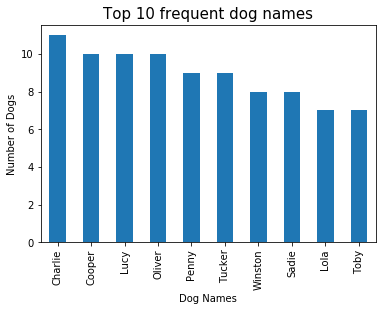

In [217]:
df1['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.plot();

* **Most frequent dogs names: Charlie, OLiver,Cooper, Penny, Tucker, Lucy, Sadie, Winston, Daisy,Lola**

### -Top 10 most frequent dog breeds?

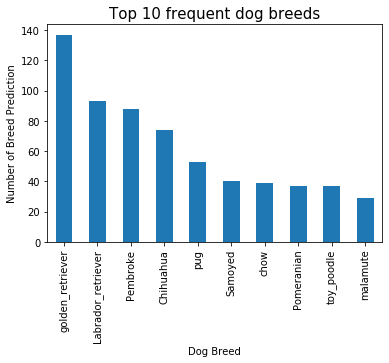

In [218]:
df1['pred_breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 10 frequent dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.plot();

* **Top 10 dogs breeds have golden retriever, labrador retriever as breed which all are rated**

In [219]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

1